In [1]:

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
url="https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv"
df = pd.read_csv(url, encoding='ISO-8859-1')

print(df)

       num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0                   2      Internet  RoundTrip            262              19   
1                   1      Internet  RoundTrip            112              20   
2                   2      Internet  RoundTrip            243              22   
3                   1      Internet  RoundTrip             96              31   
4                   2      Internet  RoundTrip             68              22   
...               ...           ...        ...            ...             ...   
49995               2      Internet  RoundTrip             27               6   
49996               1      Internet  RoundTrip            111               6   
49997               1      Internet  RoundTrip             24               6   
49998               1      Internet  RoundTrip             15               6   
49999               1      Internet  RoundTrip             19               6   

       flight_hour flight_d

In [3]:
#checking for datatypes

df.dtypes

,0
num_passengers,int64
sales_channel,object
trip_type,object
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,object
route,object
booking_origin,object
wants_extra_baggage,int64


In [4]:
df.shape

(50000, 14)

In [5]:

#null values

df.isnull().sum()

,0
num_passengers,0
sales_channel,0
trip_type,0
purchase_lead,0
length_of_stay,0
flight_hour,0
flight_day,0
route,0
booking_origin,0
wants_extra_baggage,0


In [6]:
df.booking_complete.value_counts()


,count
booking_complete,
0,42522
1,7478


In [7]:
X= df.drop('booking_complete',axis=1)
y= df.booking_complete

#changing object dtype to int dtype
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

In [8]:
X.dtypes

,0
num_passengers,int64
sales_channel,int64
trip_type,int64
purchase_lead,int64
length_of_stay,int64
flight_hour,int64
flight_day,int64
route,int64
booking_origin,int64
wants_extra_baggage,int64


In [9]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores # show a few features with their MI scores

,MI Scores
route,0.052878
booking_origin,0.048971
flight_duration,0.017766
wants_extra_baggage,0.013008
length_of_stay,0.006728
wants_in_flight_meals,0.006190
num_passengers,0.005087
wants_preferred_seat,0.002992
purchase_lead,0.002601
flight_hour,0.001816


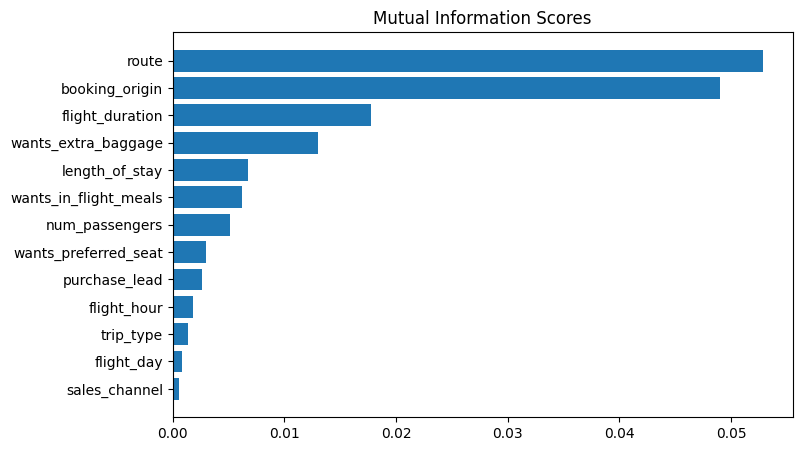

In [10]:

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [12]:

#test train split

from sklearn.model_selection import train_test_split

# dataset split
# creating a function for dataset split
def dataset(X,y):
    train_full_X, val_X, train_full_y, val_y = train_test_split(X, y,test_size=0.2,random_state = 0)

# Use the same function above for the validation set
    train_X, test_X, train_y, test_y = train_test_split(train_full_X, train_full_y, test_size=0.25,random_state = 0)
    return (train_X, val_X, train_y, val_y)

In [13]:
from sklearn.preprocessing import MinMaxScaler

def scale(X):
    scaler = MinMaxScaler()
    scaler.fit(X)
    return X


Model 1 : Random forest classifier with top 6 features

In [14]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier



#assigning the features under a list

features=['route','booking_origin','flight_duration','wants_extra_baggage', 'length_of_stay','num_passengers']
X= df[features]
#one hot encoding
X = pd.get_dummies(X, columns=features)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  83.36
AUC score:  0.5657818407546988


Model 2 : Random forest classifier with all features

In [15]:

X= df.drop('booking_complete',axis=1)
#one hot encoding
X = pd.get_dummies(X)
X= scale(X)
y= df.booking_complete

X_train,X_val,y_train,y_val= dataset(X,y)

forest_model= RandomForestClassifier(random_state=1)
forest_model.fit(X_train, y_train)
preds= forest_model.predict(X_val)

print('ACCURACY: ',accuracy_score(y_val,preds)*100)
print('AUC score: ',roc_auc_score(y_val,preds))

ACCURACY:  84.76
AUC score:  0.5479604084813514


SVM

In [16]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
url = 'https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv'
df = pd.read_csv(url, encoding='latin1')

# Preprocess the data

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features and target
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy*100:.2f}')
print('Classification Report:')
print(classification_report_output)


Accuracy: 85.20
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000



In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
url = 'https://cdn.theforage.com/vinternships/companyassets/tMjbs76F526fF5v3G/L3MQ8f6cYSkfoukmz/1667814300249/customer_booking.csv'
df = pd.read_csv(url, encoding='latin1')

# Preprocess the data

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])

# Split the data into features and target
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature values for SVM
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Make predictions with SVM
y_pred_svm = svm_model.predict(X_test_scaled)

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the SVM model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
classification_report_svm = classification_report(y_test, y_pred_svm)

print('SVM Model')
print(f'Accuracy: {accuracy_svm:.2f}')
print('Classification Report:')
print(classification_report_svm)

# Evaluate the Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
classification_report_rf = classification_report(y_test, y_pred_rf)

print('Random Forest Model')
print(f'Accuracy: {accuracy_rf:.2f}')
print('Classification Report:')
print(classification_report_rf)


SVM Model
Accuracy: 0.85
Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      8520
           1       0.00      0.00      0.00      1480

    accuracy                           0.85     10000
   macro avg       0.43      0.50      0.46     10000
weighted avg       0.73      0.85      0.78     10000

Random Forest Model
Accuracy: 0.86
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      8520
           1       0.57      0.11      0.19      1480

    accuracy                           0.86     10000
   macro avg       0.72      0.55      0.55     10000
weighted avg       0.82      0.86      0.81     10000

